<a href="https://colab.research.google.com/github/jinzus/miscellaneous/blob/main/HIERARCHICAL_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*"Think of many tiny bubbles floating on water and gradually attaching to each other until there's one big group of bubbles."*  [from "Hands-On Machine Learning with Scikit-Learn, Keras and TensorFlow; Aurélien Géron]

This is a wonderful metaphor to describe the fundamental idea in Agglomerative Clustering.
Let's now implement the algorithm from scratch!

In [1]:
# Import dependencies

import numpy as np
from sklearn import datasets
from scipy.spatial import distance_matrix
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt 
from scipy.cluster.hierarchy import dendrogram

In [2]:
# The algorithm is built over the first ten instances due to visualization purposes, but it can be extended to any number of instances in this dataset
# The names of the instances are their indices

iris=datasets.load_iris()
dataset=iris.data[:10]
sim=distance_matrix(dataset,dataset)

In [3]:
# The linkage can be performed in different modes, in the following I have implement single, complete and average.

class HierarchicalClustering:
  def __init__(self,mat,names=None,mode="single"):
    self.similarity_mat=mat
    self.mode=mode
    self.data=len(mat)-1
    self.clusternames=[]
    if names:
      self.singles=names
    else: 
      self.singles=[str(item) for item in np.arange(len(mat))]
  def train(self):
    def linkage(vec,take,mode=self.mode):
      if mode=="single":
        cluster=np.min(vec,axis=0)
      elif mode=="average":
        cluster=np.mean(vec,axis=0)
      elif mode=="complete":
        cluster=np.max(vec,axis=0)
      for item in sorted(take.tolist())[::-1]:
        cluster=np.delete(cluster,item)
      cluster=np.concatenate((cluster,np.array([0])))
      return cluster
    def build_dendrogram():
      items=[self.singles[m_similar[0]]+"-"+self.singles[m_similar[1]]]
      for ind in sorted(m_similar)[::-1]:
        del(self.singles[ind])
      self.singles.extend(items)
      self.clusternames.append(items+["similarity: {:.2f}".format(min_val)])
    def update_mat():
      collect=set()
      for row in self.similarity_mat:
        for col in row:
          collect.add(col)
      min_val=min(collect-{0})
      most_similar=np.argwhere(self.similarity_mat==min_val)[0]
      similars=np.vstack((self.similarity_mat[most_similar[0]],self.similarity_mat[most_similar[1]]))
      cluster=linkage(similars,most_similar)
      smaller=self.similarity_mat
      for ind in range(len(most_similar)):
        for item in sorted(most_similar.tolist())[::-1]:
          smaller=np.delete(smaller,item,ind)
      update=np.empty((len(self.similarity_mat)-1,len(self.similarity_mat)-1))
      for ind,item in enumerate(smaller):
        update[ind,:-1]=item
      update[-1]=cluster
      update[:,-1]=cluster
      return most_similar,min_val,update
    for item in range(self.data):
      m_similar,min_val,self.similarity_mat=update_mat()
      build_dendrogram()

In [4]:
single_linkage=HierarchicalClustering(sim)
single_linkage.train()
single_linkage.clusternames

[['0-4', 'similarity: 0.14'],
 ['7-0-4', 'similarity: 0.17'],
 ['1-9', 'similarity: 0.17'],
 ['2-3', 'similarity: 0.24'],
 ['6-2-3', 'similarity: 0.26'],
 ['8-6-2-3', 'similarity: 0.30'],
 ['1-9-8-6-2-3', 'similarity: 0.30'],
 ['7-0-4-1-9-8-6-2-3', 'similarity: 0.33'],
 ['5-7-0-4-1-9-8-6-2-3', 'similarity: 0.62']]

In [5]:
complete_linkage=HierarchicalClustering(sim,mode="complete")
complete_linkage.train()
complete_linkage.clusternames

[['0-4', 'similarity: 0.14'],
 ['1-9', 'similarity: 0.17'],
 ['7-0-4', 'similarity: 0.22'],
 ['2-3', 'similarity: 0.24'],
 ['6-2-3', 'similarity: 0.33'],
 ['1-9-6-2-3', 'similarity: 0.51'],
 ['8-1-9-6-2-3', 'similarity: 0.56'],
 ['5-7-0-4', 'similarity: 0.70'],
 ['8-1-9-6-2-3-5-7-0-4', 'similarity: 1.46']]

In [6]:
average_linkage=HierarchicalClustering(sim,mode="average")
average_linkage.train()
average_linkage.clusternames

[['0-4', 'similarity: 0.14'],
 ['1-9', 'similarity: 0.17'],
 ['7-0-4', 'similarity: 0.20'],
 ['2-3', 'similarity: 0.24'],
 ['6-2-3', 'similarity: 0.30'],
 ['1-9-6-2-3', 'similarity: 0.41'],
 ['7-0-4-1-9-6-2-3', 'similarity: 0.47'],
 ['8-7-0-4-1-9-6-2-3', 'similarity: 0.68'],
 ['5-8-7-0-4-1-9-6-2-3', 'similarity: 1.16']]

SKLEARN IMPLEMENTATION: Let's evaluate if the algorithm corresponds to the basic version offered by Scikit_Learn

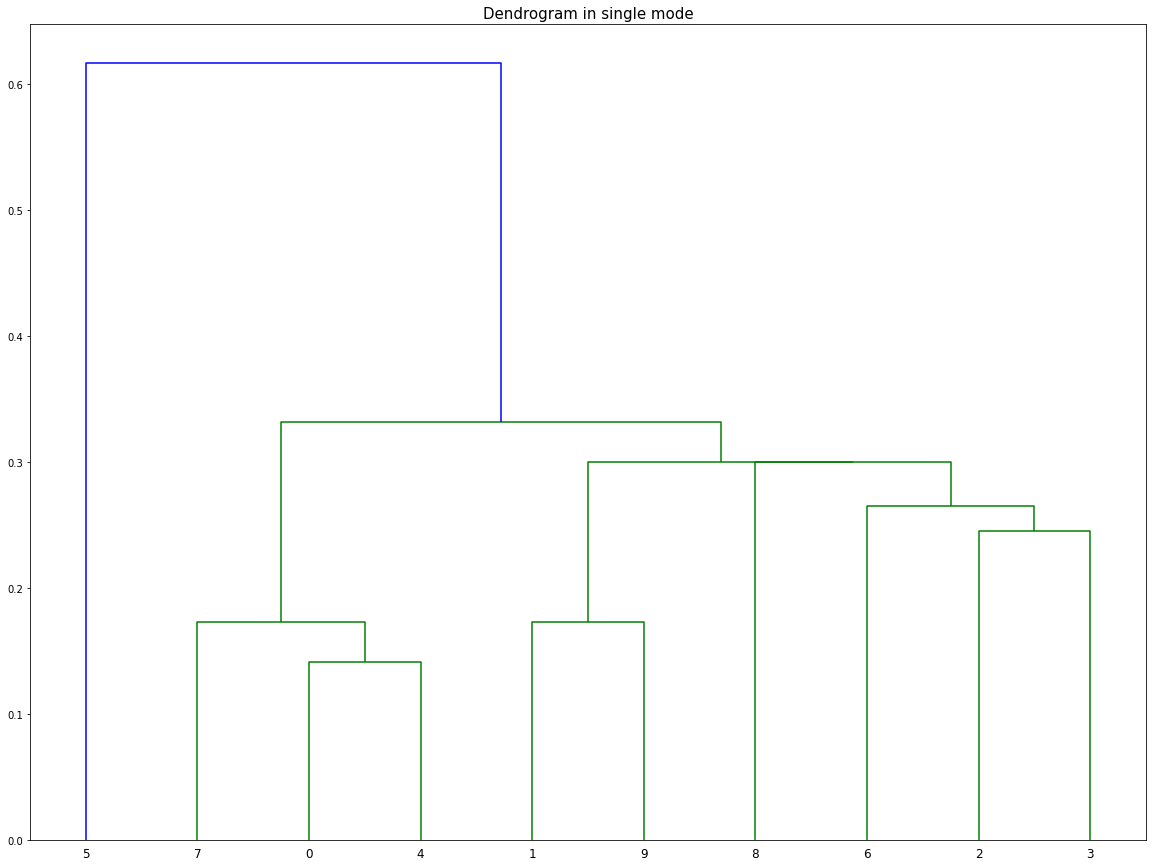

In [7]:
#Single linkage

mode="single"

clustering=AgglomerativeClustering(distance_threshold=0,n_clusters=None,linkage=mode).fit(dataset)

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize=(20,15))
plt.title("Dendrogram in {:s} mode".format(mode),fontsize=15)
plot_dendrogram(clustering)

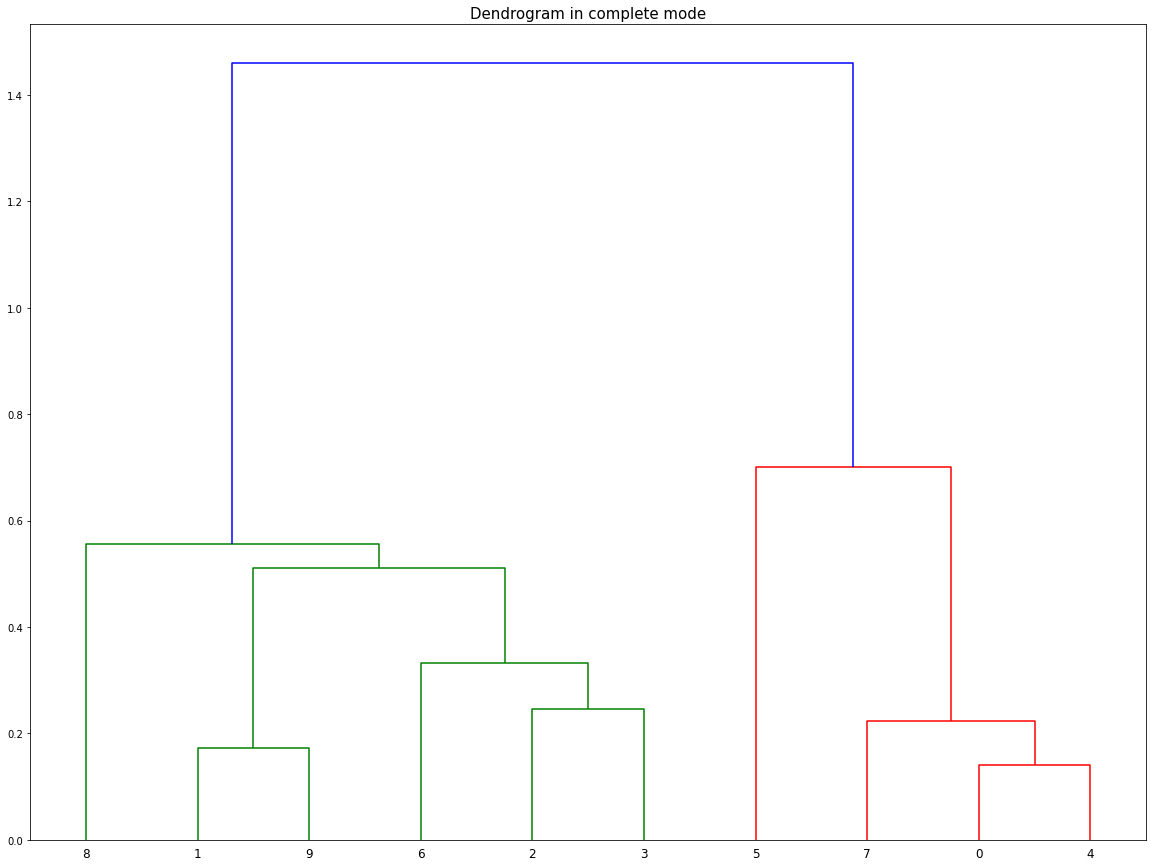

In [8]:
# Complete linkage

mode="complete"

clustering=AgglomerativeClustering(distance_threshold=0,n_clusters=None,linkage=mode).fit(dataset)


def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize=(20,15))
plt.title("Dendrogram in {:s} mode".format(mode),fontsize=15)
plot_dendrogram(clustering)

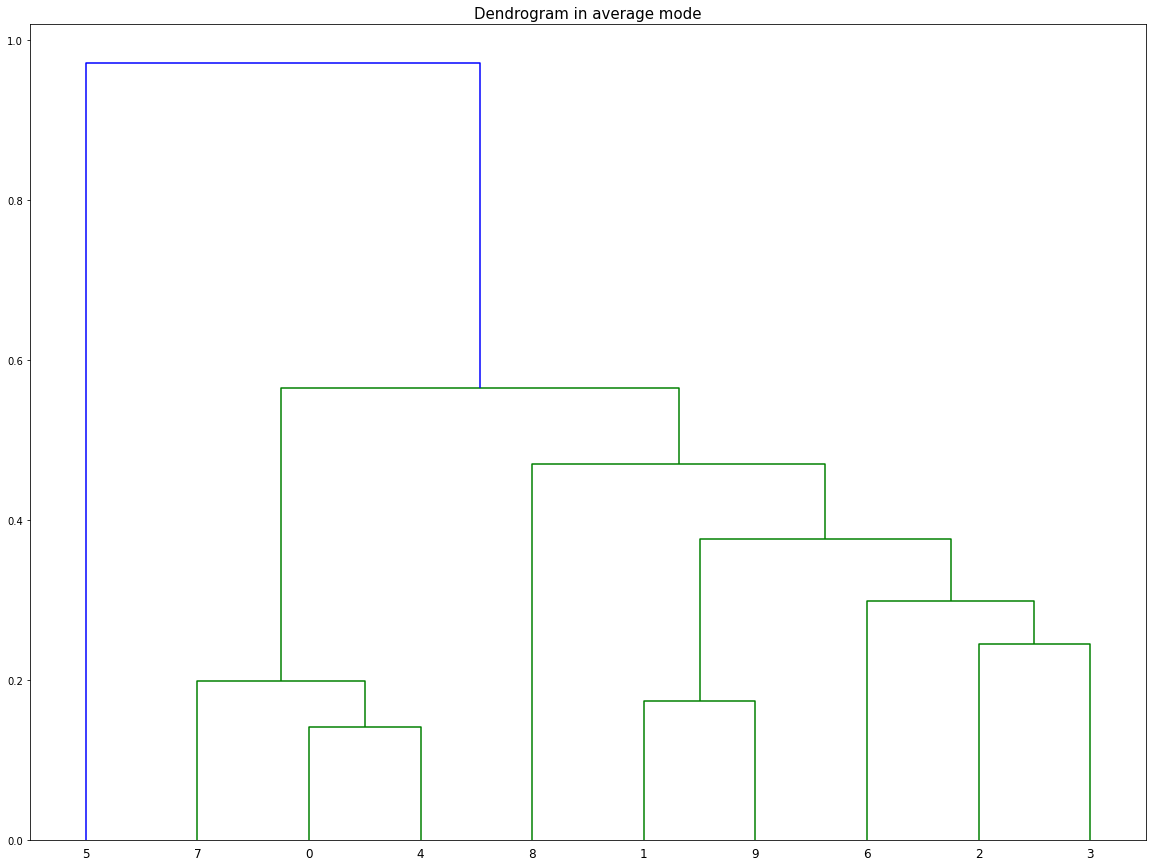

In [9]:
# Average linkage

mode="average"

clustering=AgglomerativeClustering(distance_threshold=0,n_clusters=None,linkage=mode).fit(dataset)


def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize=(20,15))
plt.title("Dendrogram in {:s} mode".format(mode),fontsize=15)
plot_dendrogram(clustering)